In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
sns.set()

In [3]:
from sklearn.datasets import load_iris

In [4]:
dataset = load_iris()

In [5]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
df = pd.DataFrame(data=dataset.data, columns= dataset.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [9]:
df["target"] = dataset.target
df.head()

sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0
4                5.0               3.6  ...               0.2       0

[5 rows x 5 columns]

In [11]:
[col.replace(" (cm)", "").replace(" ", "_") for col in df.columns]

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

In [12]:
df.columns = [col.replace(" (cm)", "").replace(" ", "_") for col in df.columns]

In [13]:
df.sample(5)

sepal_length  sepal_width  petal_length  petal_width  target
35            5.0          3.2           1.2          0.2       0
145           6.7          3.0           5.2          2.3       2
137           6.4          3.1           5.5          1.8       2
28            5.2          3.4           1.4          0.2       0
135           7.7          3.0           6.1          2.3       2

In [14]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr = LogisticRegression() #create a LR object here

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [42]:
lr.fit(X = train_df.iloc[:, 0:4], 
       y = train_df.target) # train the lr object model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
lr.intercept_

array([  8.89174087,   2.15156114, -11.04330201])

In [44]:
lr.coef_

array([[-0.36133052,  0.91530075, -2.35810038, -1.00624816],
       [ 0.53029401, -0.4438527 , -0.13251541, -0.92421467],
       [-0.16896349, -0.47144805,  2.49061579,  1.93046282]])

In [45]:
# Evaluation

In [46]:
test_df.sample(5)

sepal_length  sepal_width  petal_length  petal_width  target
76            6.8          2.8           4.8          1.4       1
116           6.5          3.0           5.5          1.8       2
104           6.5          3.0           5.8          2.2       2
30            4.8          3.1           1.6          0.2       0
139           6.9          3.1           5.4          2.1       2

In [47]:
lr.predict([[6.2, 2.8, 4.8, 1.8]])

array([2])

In [48]:
y_pred = lr.predict(test_df.iloc[:, 0:4])
y_pred

array([2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0,
       2, 1, 2, 1, 0, 0, 0, 1])

In [49]:
y_act = test_df.target.values
y_act

array([2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0,
       2, 1, 2, 1, 0, 0, 0, 1])

In [50]:
(y_pred == y_act)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [51]:
# 1. Accuracy 
(y_pred == y_act).mean()

0.9666666666666667

In [ ]:
# True  - 1 
# False - 0 

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_act, y_pred)

0.9666666666666667

In [ ]:
# Actual 
# N, N, N, N, Y, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N

In [ ]:
# Predict 
# N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N

In [54]:
24/25

0.96

In [ ]:
# Accuracy for YES  - 0 %
# Accuracy for NO   - 96%

In [55]:
# 2. Confusion Matrix

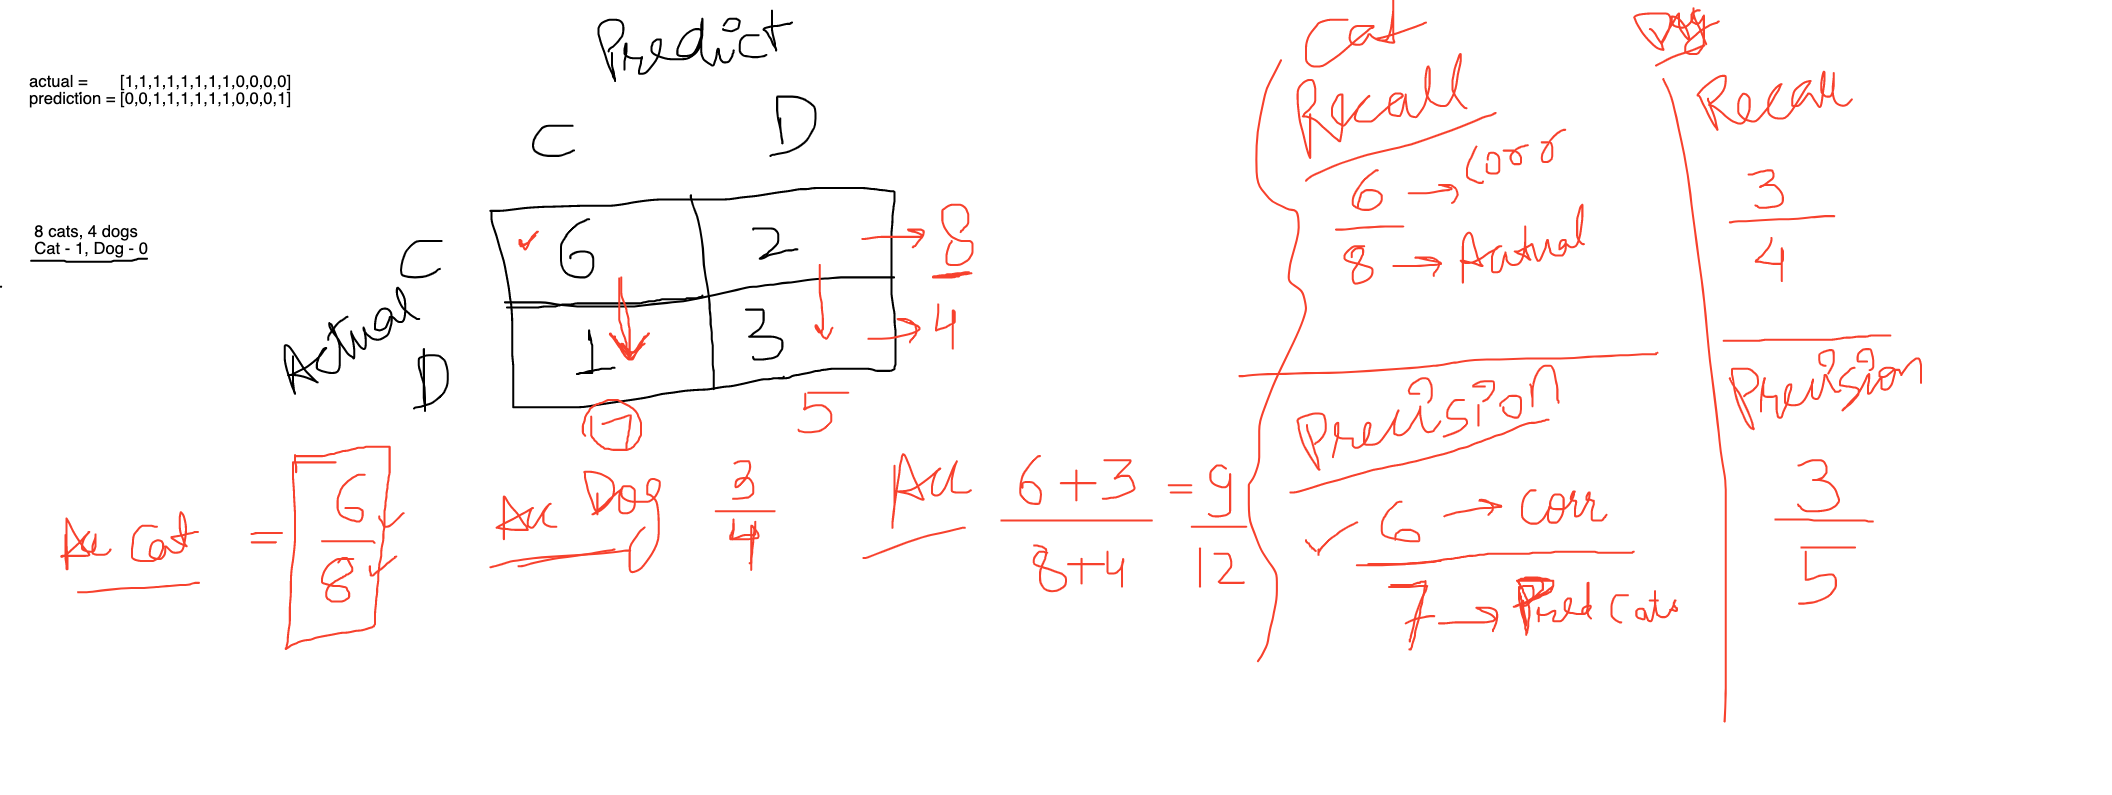

In [ ]:
# Recall (from data POV)      = (correctly predicted / Acutal total) 
# Precision (from model POV)  = (correctly predicted / model predicted)  

In [56]:
from sklearn.metrics import confusion_matrix

In [59]:
confusion_matrix(y_act, y_pred)

array([[11,  0,  0],
       [ 0,  8,  0],
       [ 0,  1, 10]])

In [62]:
pd.DataFrame(confusion_matrix(y_act, y_pred), index= dataset.target_names, columns= dataset.target_names)

setosa  versicolor  virginica
setosa          11           0          0
versicolor       0           8          0
virginica        0           1         10

In [ ]:
# Recall, Precision
# F1 Score - Take a HP mean of Recal & precision

In [63]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(y_act, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.89      1.00      0.94         8
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [69]:
test_df.target.value_counts().sort_index()

0    11
1     8
2    11
Name: target, dtype: int64

In [70]:
# Confusion Matrix - https://en.wikipedia.org/wiki/Confusion_matrix

In [71]:
lr.intercept_

array([  8.89174087,   2.15156114, -11.04330201])

In [72]:
lr.coef_

array([[-0.36133052,  0.91530075, -2.35810038, -1.00624816],
       [ 0.53029401, -0.4438527 , -0.13251541, -0.92421467],
       [-0.16896349, -0.47144805,  2.49061579,  1.93046282]])

In [73]:
# prob_for_setosa = sepal_length*(-0.36) + sepal_width*(0.91) + (petal_length)*(-2.3) + petal_width*(-1.006) + 8.89
# prob_for_vc
# prob_for_virginica

In [74]:
lr.predict([[6.2, 2.8, 4.8, 1.8]])

array([2])

In [75]:
lr.predict_proba([[6.2, 2.8, 4.8, 1.8]])

array([[0.00140166, 0.46889889, 0.52969945]])

In [77]:
np.argmax(lr.predict_proba([[6.2, 2.8, 4.8, 1.8]]))

2

### Decision Tree